In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Exploratory Data Analysis

Data yang digunakan berupa employability dari sebuah universitas.

In [10]:
df = pd.read_csv('./dataset/Placement_Data_Full_Class.csv')

In [11]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [13]:
df.groupby('status')[['status', 'salary']].count()

,status,salary
status,,
Not Placed,67,0
Placed,148,148


Salary dan sl_no (Serial Number) tidak digunakan dalam prediksi ini, karena tidak berpengaruh terhadap status penerimaan

In [14]:
df.drop(['salary', 'sl_no'], axis=1, inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [15]:
df['status'] = df.status.replace(['Placed', 'Not Placed'], [1, 0])

# Removing outlier using IQR technique

In [16]:
# Dataframe untuk status = 1 (Placed)
df_status_1 = df[df["status"] == 1].copy()

df_status_1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,1
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1


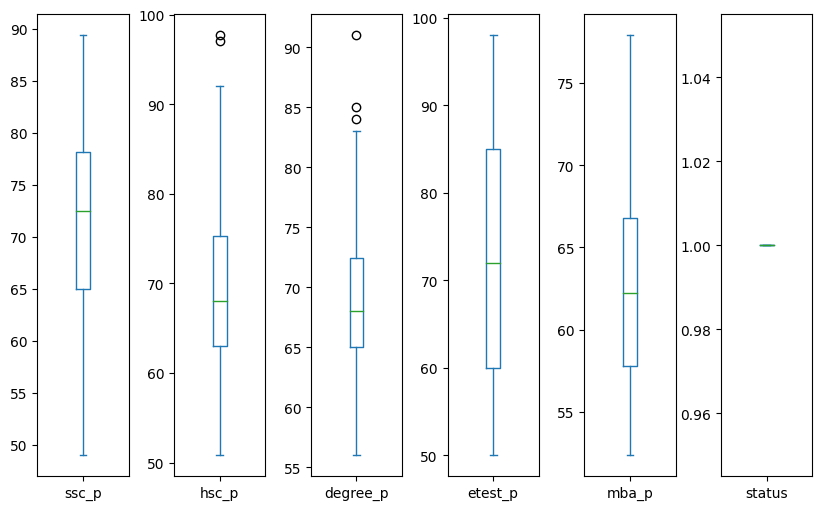

In [17]:
# Outlier detection untuk df_status_1
df_status_1.plot(kind = "box", subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [18]:
# Dataframe untuk status = 0 (Not Placed)
df_status_0 = df[df["status"] == 0].copy()

df_status_0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,0
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,0
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,0
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,0
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0


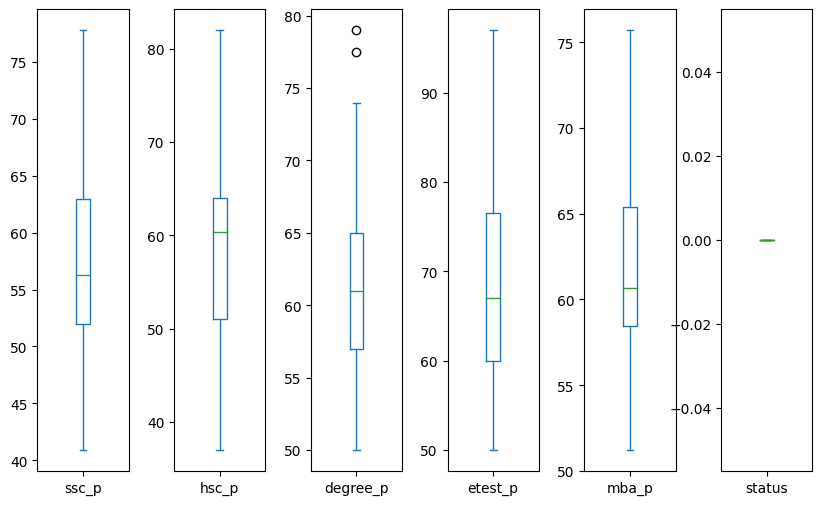

In [19]:
# Outlier detection untuk df_status_0

df_status_0.plot(kind = "box", subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [20]:
changed = True
while changed:
    changed = False
    for column in df_status_1.select_dtypes(include=np.number).columns:
        if(column != 'status'):
            q1 = df_status_1[column].quantile(0.25)
            q2 = df_status_1[column].median()
            q3 = df_status_1[column].quantile(0.75)
            iqr = q3 - q1
            max = q3 + (1.5 * iqr)
            min = q1 - (1.5 * iqr)
            if (df_status_1[column].loc[df_status_1[column] > max].any() or df_status_1[column].loc[df_status_1[column] < min].any()):
                df_status_1[column].loc[df_status_1[column] > max] = q2
                df_status_1[column].loc[df_status_1[column] < min] = q2
                changed = True

changed = True
while changed:
    changed = False
    for column in df_status_0.select_dtypes(include=np.number).columns:
        if(column != 'status'):
            q1 = df_status_0[column].quantile(0.25)
            q2 = df_status_0[column].median()
            q3 = df_status_0[column].quantile(0.75)
            iqr = q3 - q1
            max = q3 + (1.5 * iqr)
            min = q1 - (1.5 * iqr)
            if(df_status_0[column].loc[df_status_0[column] > max].any() or df_status_0[column].loc[df_status_0[column] < min].any()):
                df_status_0[column].loc[df_status_0[column] > max] = q2
                df_status_0[column].loc[df_status_0[column] < min] = q2
                changed = True

/tmp/ipykernel_35686/4245190992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status_1[column].loc[df_status_1[column] > max] = q2
/tmp/ipykernel_35686/4245190992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status_1[column].loc[df_status_1[column] < min] = q2
/tmp/ipykernel_35686/4245190992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status_1[column].loc[df_status_1[column] > max] = q2
/tmp/ipykernel_3

In [21]:
df_status_combined = pd.concat([df_status_1, df_status_0])

df_status_combined

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,1
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.00,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0
201,M,54.20,Central,63.00,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0
208,F,43.00,Central,60.00,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0


# Ubah data categorical menjadi numerical

In [22]:
list_column_categorical = list(df_status_combined.select_dtypes(exclude = np.number).columns.values)

for column_name in list_column_categorical:

    df_status_combined[column_name] = df_status_combined[column_name].astype("category")
    df_status_combined[column_name] = df_status_combined[column_name].cat.codes

# Normalisasi

In [23]:
std_scaler = StandardScaler()

scaled_data = std_scaler.fit_transform(df_status_combined.drop('status', axis=1))

df_combined_scaled = pd.DataFrame(scaled_data, columns = df_status_combined.columns.drop('status')).join(df_status_combined['status'])

df_combined_scaled

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0.739434,-0.028087,1.082459,2.386570,0.800763,-0.641955,-1.168257,1.576284,-0.724446,-1.291091,1.123903,-0.597647,1
1,0.739434,1.113369,-0.923823,1.174140,0.800763,1.083298,1.719957,1.576284,1.380364,1.087157,-0.889757,0.687620,1
2,0.739434,-0.213238,-0.923823,0.185631,-1.248809,-2.367207,-0.278663,-0.675550,-0.724446,0.218908,-0.889757,-0.769474,1
3,0.739434,1.712332,-0.923823,0.721512,-1.248809,-0.641955,1.100206,-0.675550,-0.724446,1.864806,-0.889757,-1.164676,0
4,0.739434,1.360545,-0.923823,-0.197141,-1.248809,1.083298,0.017868,1.576284,1.380364,-0.385092,-0.889757,-0.023744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-1.352386,-0.028087,-0.923823,0.377017,-1.248809,-0.641955,-0.130398,0.450367,-0.724446,1.200407,1.123903,1.663598,1
211,0.739434,-1.213053,-0.923823,-0.292834,0.800763,1.083298,-1.168257,-0.675550,-0.724446,0.520907,1.123903,-0.659504,1
212,0.739434,-2.435049,-0.923823,-2.302387,-1.248809,1.083298,-0.871726,-0.675550,-0.724446,1.879906,-0.889757,-1.527231,1
213,-1.352386,-2.249898,-0.923823,-0.579913,0.800763,1.083298,-0.130398,-0.675550,-0.724446,1.552236,1.123903,0.110281,1


# Pairplot

In [24]:
# sns.pairplot(df_status_combined, hue='status')

In [25]:
# plt.subplots(figsize=(10,10))
# sns.heatmap(df_status_combined.corr(), annot=True)

# Scaling Data

In [26]:
df = df_combined_scaled

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis = 1), df['status'], test_size=0.3, random_state=42)

# Model

# KNN

# SVM

## Untuned

In [28]:
untuned_svc = SVC(random_state=42)
untuned_svc.fit(X_train, y_train)
print(classification_report(y_test, untuned_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.67      0.98      0.80        44

    accuracy                           0.66        65
   macro avg       0.34      0.49      0.40        65
weighted avg       0.45      0.66      0.54        65



# Tuned

In [29]:
untuned_svc = SVC(C=50, random_state=42, kernel='poly', degree=10, gamma='scale')
untuned_svc.fit(X_train, y_train)
print(classification_report(y_test, untuned_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.10      0.17        21
           1       0.69      0.98      0.81        44

    accuracy                           0.69        65
   macro avg       0.68      0.54      0.49        65
weighted avg       0.68      0.69      0.60        65



# AdaBoost

In [58]:
# load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

Using Default Base Estimator (Decision Tree)

In [56]:
adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=5, random_state=99)

ada_model = adaboost_classifier.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.05      0.08        21
           1       0.67      0.91      0.77        44

    accuracy                           0.63        65
   macro avg       0.43      0.48      0.42        65
weighted avg       0.52      0.63      0.55        65

Accuracy: 0.6307692307692307


Using SVC Base Estimator

In [67]:
svc = SVC(probability=True, kernel='linear')

adaboost_classifier = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1, random_state=99)

ada_model = adaboost_classifier.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

/home/divaangelika/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [69]:
print(classification_report(y_test, y_pred))
print("Accuracy:" , metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.68      1.00      0.81        44

    accuracy                           0.68        65
   macro avg       0.34      0.50      0.40        65
weighted avg       0.46      0.68      0.55        65

Accuracy: 0.676923076923077


/home/divaangelika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/divaangelika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/divaangelika/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
